In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.ticker as ticker
import pandas as pd
import glob
import re
# Statistics
from scipy.stats import norm
from scipy.special import factorial
from scipy.special import gammaln
import scipy.optimize as spo
# Parallel
from concurrent.futures import ProcessPoolExecutor, as_completed
from tqdm import tqdm

In [8]:
# Matplotlib customize
plt.rcParams['figure.figsize'] = [6,5]
plt.rcParams['figure.dpi'] = 100

plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20

plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['lines.markersize'] = 4

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

plt.rcParams['legend.fontsize'] = 12
plt.rcParams['legend.markerscale'] = 1.5
plt.rcParams['legend.borderpad'] = 0.6
plt.rcParams['legend.framealpha'] = 0.7

In [9]:
data = pd.read_csv('pvalue.csv',sep=',')
mass = data['Mass']
pvalue = data['pvalue']

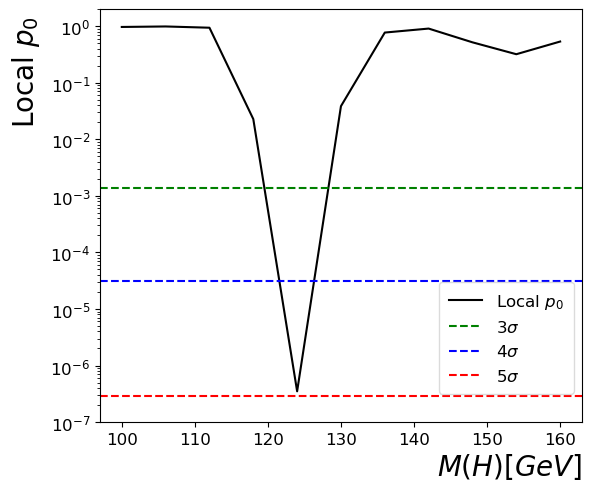

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(mass,pvalue,color='k',label=r'Local $p_{0}$')

#ax.axvline(x=qmObs,color='k',label=r'$q_{0,obs}$')

# Label X
ax.set_xlabel(r'$M(H)[GeV]$')
ax.xaxis.set_label_coords(0.85,-0.07)

# Label Y
ax.set_ylabel(r'Local $p_{0}$')
ax.yaxis.set_label_coords(-0.12,0.85)

ax.set_yscale('log')
ax.set_ylim(1e-7,2)

ax.axhline(y = 1-norm.cdf(3),ls='--',color='g',label=r'$3\sigma$')
ax.axhline(y = 1-norm.cdf(4),ls='--',color='b',label=r'$4\sigma$')
ax.axhline(y = 1-norm.cdf(5),ls='--',color='r',label=r'$5\sigma$')

# Ajustar los márgenes automáticamente
plt.tight_layout()

#Legend
ax.legend(loc='upper right',bbox_to_anchor=(1,0.36),ncol=1,title='')

#
plt.savefig('LocalP0.pdf')